## CNN Audio Classification based on Filter Banks for the Google Command Dataset.
## MobileNet

In [1]:
import os
#Find out platform where we are running.
PLATFORM = "GENERIC"
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  PLATFORM = "COLAB"
else:
    if(os.name=='nt'):
        PLATFORM = 'WINDOWS'
    elif(os.name=='posix'):
        PLATFORM = 'LINUX'
    print("Running on "+PLATFORM)

Running on CoLab


In [2]:
if PLATFORM=='COLAB':
    !pip install SoundFile
    !pip install librosa
    !pip install SpeechRecognition
    !pip install keras

     |████████████████████████████████| 32.8MB 93kB/s 


Google Drive import

In [3]:
if PLATFORM=='COLAB':
    from google.colab import drive
    drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
if PLATFORM=='COLAB':
    !unzip "/content/gdrive/My Drive/data/speech_commands_v0.02_IMG.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/speech_commands_v0.02_IMG/yes/8fe67225_nohash_3.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/8fe67225_nohash_4.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/8ff44869_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/902258bb_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/90645155_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/90804775_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/90b0b91a_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/90e72357_nohash_0.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/90e72357_nohash_1.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/bfd26d6b_nohash_3.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/bfd26d6b_nohash_4.png  
  inflating: /content/speech_commands_v0.02_IMG/yes/bfdb9801_nohash_0.png  
  inflating: /content/speech_commands

In [5]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as display
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random
from keras import backend as K

In [11]:
#Add drive to path to be able to mount from there.
if PLATFORM=='COLAB':
    sys.path.append('/content/gdrive/My Drive/Colab Notebooks') #here is src located
    PROJECT_HOME = os.path.dirname(os.getcwd())
else:
  #PROJECT_HOME = os.getcwd()+"/"
  # NOTE that in this Jupyter notebook, the parent folder is the project home, not this!
  PROJECT_HOME = 'D:/Student Project MAML/'
  PROJECT_HOME = os.path.dirname(os.getcwd())+"/"  

sys.path.append("..") # Adds higher directory to python modules path. This is important to load the libraries  in PROJECT_HOME/src/
import src.d01_load_data as ld #Library to load data and handle data.
import src.preprocess_dataset as prepDS #Add the library where the code to split the dataset is located.


checkpointPath = PROJECT_HOME+"Speech Recognition/checkpoints/"
#commands = ["yes","one","left","bird","cat","dog"]
commands = ["yes","no"]
commands = ["yes","one","left","bird"]
commands = "ALL"

#SAMPLES_PER_CLASS = 100
SAMPLES_PER_CLASS = "ALL"


#commands = ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [12]:
#GPU Available?
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
# Execute:
# python create_img_dataset.py

In [14]:
#SR_DATA = "Speech Recognition/speech_commands_mini_IMG/" #Command dataset folder.
SR_DATA = "Speech Recognition/speech_commands_minmed_IMG/" #Command dataset folder.
SR_DATA = "Speech Recognition/speech_commands_v0.01_IMG/" #Command dataset folder.
SR_DATA = "Speech Recognition/speech_commands_v0.02_IMG/" #Command dataset folder.
#SR_DATA = "Speech Recognition/speech_commands_v0.01_reverse_IMG/" #Command dataset folder.
#SR_DATA = "Speech Recognition/speech_commands_medium_IMG/" #Command dataset folder.
#SR_DATA="Speech Recognition/commands_multilanguage/spanish_WAV_IMG/" 

if PLATFORM is "COLAB":
    SR_DATA = "content/speech_commands_v0.02_IMG/" #Command dataset folder.

data_dir = PROJECT_HOME + SR_DATA

BATCH_SIZE = 8
IMG_HEIGHT = 40
IMG_WIDTH = 100

train_per = 0.8
val_per = 0.1
test_per = 0.1

lr = 0.0005

### Data Pipeline

In [15]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

### Process Google command dataset

In [16]:
#Normal dataset for training.
print(PROJECT_HOME)
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print(data_path)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds,DATASET_SIZE,CLASS_NAMES = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,commands, SAMPLES_PER_CLASS,PLATFORM)
train_ds, test_ds, val_ds = prepDS.prepare_for_training(labeled_ds, train_per, val_per, test_per,DATASET_SIZE,BATCH_SIZE,AUTOTUNE, cache=False, shuffle_buffer_size=1000,epochs=1)
print("DATASET_SIZE after filtering: ",DATASET_SIZE)
print(CLASS_NAMES)

class_names = list(CLASS_NAMES)
class_names

/
/content/speech_commands_v0.02_IMG
DATASET_SIZE before filtering:  106231
There are  106231  samples in the filtered dataset.
DATASET_SIZE after filtering:  106231
['_background_noise_' 'backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight'
 'five' 'follow' 'forward' 'four' 'go' 'happy' 'house' 'learn' 'left'
 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven' 'sheila' 'six'
 'stop' 'three' 'tree' 'two' 'up' 'visual' 'wow' 'yes' 'zero']


['_background_noise_',
 'backward',
 'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'follow',
 'forward',
 'four',
 'go',
 'happy',
 'house',
 'learn',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'visual',
 'wow',
 'yes',
 'zero']

### Paper split

In [17]:
digits=['zero','one','two','three','four','five','six','seven','eight','nine']
commands_10=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

allCommandsL = ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow',
 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no',
 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree',
 'two', 'up', 'visual', 'wow', 'yes', 'zero','_background_noise_']

unknown = ['bed','dog','happy','marvin','wow']

silence = ['_background_noise_']

known_d = list(set(allCommandsL) - set(digits) - set(unknown) - set(silence))
known_10 = list(set(allCommandsL) - set(commands_10) - set(unknown) - set(silence))

print(known_d)
print(known_10)

['sheila', 'learn', 'up', 'left', 'down', 'visual', 'follow', 'no', 'stop', 'on', 'go', 'off', 'backward', 'house', 'bird', 'forward', 'yes', 'cat', 'right', 'tree']
['sheila', 'six', 'one', 'learn', 'four', 'seven', 'visual', 'follow', 'five', 'two', 'zero', 'eight', 'three', 'house', 'bird', 'forward', 'nine', 'cat', 'backward', 'tree']


In [18]:
#Known_d dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_kd,DATASET_SIZE_kd,CLASS_NAMES_kd = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,known_d, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_kd)
print(CLASS_NAMES_kd)


DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  56502  samples in the filtered dataset.
56502
['sheila' 'learn' 'up' 'left' 'down' 'visual' 'follow' 'no' 'stop' 'on'
 'go' 'off' 'backward' 'house' 'bird' 'forward' 'yes' 'cat' 'right' 'tree']


In [19]:
#Known_10 dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_k10,DATASET_SIZE_k10,CLASS_NAMES_k10 = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,known_10, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_k10)
print(CLASS_NAMES_k10)

DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  56864  samples in the filtered dataset.
56864
['sheila' 'six' 'one' 'learn' 'four' 'seven' 'visual' 'follow' 'five'
 'two' 'zero' 'eight' 'three' 'house' 'bird' 'forward' 'nine' 'cat'
 'backward' 'tree']


In [20]:
#unknown dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_u,DATASET_SIZE_u,CLASS_NAMES_u = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,unknown, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_u)
print(CLASS_NAMES_u)

DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  10419  samples in the filtered dataset.
10419
['bed' 'dog' 'happy' 'marvin' 'wow']


In [21]:
#digits dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_d,DATASET_SIZE_d,CLASS_NAMES_d = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,digits, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_d)
print(CLASS_NAMES_d)

DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  38908  samples in the filtered dataset.
38908
['zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight' 'nine']


In [22]:
#commands_10 dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_c10,DATASET_SIZE_c10,CLASS_NAMES_c10 = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,commands_10, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_c10)
print(CLASS_NAMES_c10)

DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  38546  samples in the filtered dataset.
38546
['yes' 'no' 'up' 'down' 'left' 'right' 'on' 'off' 'stop' 'go']


In [23]:
#silence dataset
data_path,DATASET_SIZE,CLASS_NAMES = prepDS.getInfoDataset(PROJECT_HOME+SR_DATA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE)
labeled_ds_silence,DATASET_SIZE_silence,CLASS_NAMES_silence = prepDS.getLabeledDS(data_path,DATASET_SIZE,CLASS_NAMES,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,silence, SAMPLES_PER_CLASS,PLATFORM)
print(DATASET_SIZE_silence)
print(CLASS_NAMES_silence)

DATASET_SIZE before filtering:  106231
Update DATASIZE variables
There are  402  samples in the filtered dataset.
402
['_background_noise_']


### Process Spanish Dataset

In [ ]:
#Dataset for transfer learning.
SPANISH_DATA="Speech Recognition/commands_multilanguage/spanish_WAV_IMG/"

data_path_SPA,DATASET_SIZE_SPA,CLASS_NAMES_SPA = prepDS.getInfoDataset(PROJECT_HOME+SPANISH_DATA)
print(data_path_SPA)
print("DATASET_SIZE before filtering: ",DATASET_SIZE_SPA)
labeled_ds_SPA,DATASET_SPA_SIZE,CLASS_NAMES_SPA = prepDS.getLabeledDS(data_path_SPA,DATASET_SIZE_SPA,CLASS_NAMES_SPA,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,commands="ALL", SAMPLES_PER_CLASS="ALL",PLATFORM=PLATFORM)
train_ds_SPA, test_ds_SPA, val_ds_SPA = prepDS.prepare_for_training(labeled_ds_SPA, train_per, val_per, test_per,DATASET_SIZE_SPA,BATCH_SIZE,AUTOTUNE, cache=False, shuffle_buffer_size=1000,epochs=1)
print("DATASET_SIZE after filtering: ",DATASET_SIZE_SPA)
print(CLASS_NAMES_SPA)

C:\Users\Naveen kumar Ramu\studentproject-master\Speech Recognition\commands_multilanguage\spanish_WAV_IMG
DATASET_SIZE before filtering:  570
There are  570  samples in the filtered dataset.
DATASET_SIZE after filtering:  570
['agua' 'amigo' 'azul' 'cafe' 'carro' 'cerveza' 'gato' 'gracias' 'hola'
 'mujer' 'queso']


### Process German Dataset

In [ ]:
#Dataset for transfer learning.
GERMAN_DATA="Speech Recognition/commands_multilanguage/german_WAV_IMG/"

data_path_DE,DATASET_SIZE_DE,CLASS_NAMES_DE = prepDS.getInfoDataset(PROJECT_HOME+GERMAN_DATA)
print(data_path_DE)
print("DATASET_SIZE before filtering: ",DATASET_SIZE_DE)
labeled_ds_DE,DATASET_SIZE_DE,CLASS_NAMES_DE = prepDS.getLabeledDS(data_path_DE,DATASET_SIZE_DE,CLASS_NAMES_DE,AUTOTUNE,IMG_WIDTH,IMG_HEIGHT,commands="ALL", SAMPLES_PER_CLASS="ALL",PLATFORM=PLATFORM)
train_ds_DE, test_ds_DE, val_ds_DE = prepDS.prepare_for_training(labeled_ds, train_per, val_per, test_per,DATASET_SIZE_DE,BATCH_SIZE,AUTOTUNE, cache=False, shuffle_buffer_size=1000,epochs=1)
print("DATASET_SIZE after filtering: ",DATASET_SIZE_DE)
print(CLASS_NAMES_DE)

C:\Users\Naveen kumar Ramu\studentproject-master\Speech Recognition\commands_multilanguage\german_WAV_IMG
DATASET_SIZE before filtering:  273
There are  273  samples in the filtered dataset.
DATASET_SIZE after filtering:  273
['auto' 'bier' 'brot' 'danke' 'hallo' 'haus' 'hund' 'maedchen' 'richtig'
 'stadt']


In [ ]:
#----Image Pipeline ENDS----

## MobileNet Architechture

### MobileNet V1

In [24]:
# Source: https://colab.research.google.com/drive/1uUYdZk7EbOESRP7JFwHfsR7b9gUjxU75#scrollTo=O8YDQ9cJoQus&forceEdit=true&sandboxMode=true
# Note: You may use tf.keras.layers.DepthwiseConv2D but you won't be able to add BatchNorm and LeakyReLU layers.
# Hence, we are first performing depthwise convolutions and then a Conv2D with kernel size of 1.
def SeparableConv( x , num_filters , strides , alpha=1.0 ):
    x = tf.keras.layers.DepthwiseConv2D( kernel_size=3 , padding='same' )( x )
    x = tf.keras.layers.BatchNormalization(momentum=0.9997)( x )
    x = tf.keras.layers.Activation( 'relu' )( x )
    x = tf.keras.layers.Conv2D( int(np.floor( num_filters * alpha )) , kernel_size=( 1 , 1 ) , strides=strides , use_bias=False , padding='same' )( x )
    x = tf.keras.layers.BatchNormalization(momentum=0.9997)(x)
    x = tf.keras.layers.Activation('relu')(x)
    return x

def Conv( x , num_filters , kernel_size , strides=1 , alpha=1.0 ):
    x = tf.keras.layers.Conv2D( int(np.floor( num_filters * alpha )) , kernel_size=kernel_size , strides=strides , use_bias=False , padding='same' )( x )
    x = tf.keras.layers.BatchNormalization( momentum=0.9997 )(x)
    x = tf.keras.layers.Activation('relu')(x)
    return x

def get_mobileNet(final_labels):
    # The number of classes are three.
    num_classes = final_labels
    #img_height = 40
    #img_width = 100
    FILTERS_1 = 32 # Originally 32
    FILTERS_2 = FILTERS_1*2 # 64
    FILTERS_3 = FILTERS_2*2 # 128
    FILTERS_4 = FILTERS_3*2 # 256
    FILTERS_5 = FILTERS_4*2 # 512
    FILTERS_6 = FILTERS_5*2 # 1024

    # The shape of the input image.
    #inputs = tf.keras.layers.Input( shape=( 300 , 300 , 3 ) )
    inputs = tf.keras.layers.Input( shape=( 100 , 40 , 1 ) )
    #inputs = tf.keras.layers.Input( shape=( img_height , img_width , 3 ) )

    x = Conv( inputs , num_filters=FILTERS_1 , kernel_size=1 , strides=2 )
    x = SeparableConv( x , num_filters=FILTERS_1 , strides=1 )
    """
    x = Conv( x , num_filters=FILTERS_2 , kernel_size=1 )
    x = SeparableConv( x , num_filters=FILTERS_2 , strides=2  )

    x = Conv( x , num_filters=FILTERS_3 , kernel_size=1 )
    x = SeparableConv( x , num_filters=FILTERS_3 , strides=1  )
    x = Conv( x , num_filters=FILTERS_3 , kernel_size=1 )
    x = SeparableConv( x , num_filters=FILTERS_3 , strides=2  )
    x = Conv( x , num_filters=FILTERS_4 , kernel_size=1 )
    x = SeparableConv( x , num_filters=FILTERS_4 , strides=1  )
    x = Conv( x , num_filters=FILTERS_4 , kernel_size=1 )
    x = SeparableConv( x , num_filters=FILTERS_4 , strides=2  )
    x = Conv( x , num_filters=FILTERS_5 , kernel_size=1 )
    """
    # You may uncomment the code below if you're machine could tolerate such heavy computation!
    #for i in range( 5 ):
        #x = SeparableConv(x, num_filters=512 , strides=1 )
        #x = Conv(x, num_filters=512 , kernel_size=1 )
    """
    x = SeparableConv(x, num_filters=FILTERS_5 , strides=2 )
    x = Conv(x, num_filters=FILTERS_6 , kernel_size=1 )
    """
    #x = tf.keras.layers.AveragePooling2D( pool_size=( 7 , 7 ) )( x )
    x = tf.keras.layers.AveragePooling2D( pool_size=( 3 , 3 ) )( x )
    x = tf.keras.layers.Flatten()( x )
    x = tf.keras.layers.Dense( num_classes )( x )
    outputs = tf.keras.layers.Activation( 'softmax' )( x )

    model = tf.keras.models.Model( inputs , outputs )
    
    return model

In [ ]:
model = get_mobileNet(len(class_names))
# As we doing classification, we'll use categorical crossentropy and the RMSProp optimizer.
#model.compile( loss='categorical_crossentropy' , optimizer='rmsprop' , metrics=[ 'acc' ] )
model.compile( loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005) , metrics=[ 'acc' ] )

### MobileNetV2

In [ ]:
#https://github.com/JonathanCMitchell/mobilenet_v2_keras
def relu6(x):
    return K.relu(x, max_value=6)

def first_inverted_res_block(x, expansion, stride, alpha, filters, block_id):
    #DEPTHWISE STEP
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', name='%d_conv_dw'%block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_dw_bn'%block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_dw_relu6' % block_id)(x)
    #PROJECT STEP
    x = tf.keras.layers.Conv2D(int(np.floor(filters * alpha)), kernel_size=(1,1), use_bias=False , padding='same', name='%d_conv_project'%block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_project_bn'%block_id)(x)
    return x

def inverted_res_block(x, expansion, stride, alpha, filters, block_id):
    in_channels = K.int_shape(x)[-1]
    pointwise_filters = int(filters * alpha)
    
    #EXPAND STEP
    x = tf.keras.layers.Conv2D(expansion * in_channels, kernel_size=1, use_bias=False, padding='same', name='%d_conv_expand' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_expand_bn'%block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_expand_relu' % block_id)(x)
    
    #DEPTHWISE STEP
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', use_bias=False, name='%d_conv_dw' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_dw_bn' % block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_dw_relu6' % block_id)(x)
    
    #PROJECT STEP
    x = tf.keras.layers.Conv2D(pointwise_filters, kernel_size=(1,1), use_bias=False, padding='same', name='%d_conv_project' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_project_bn' % block_id)(x)
    return x


def get_mobileNetV2(final_labels, expansion):
    
    num_classes = final_labels
    alpha = 1.0
    expansion = expansion # expansion of the channels. it's 6 for every layer except in first layer in the paper.

    # The shape of the input image.
    inputs = tf.keras.layers.Input(shape=(100, 40, 1))
    row = K.int_shape(inputs)[1]

    x = tf.keras.layers.Conv2D(int(np.floor(32 * alpha)), kernel_size=1, 
                               strides=2, use_bias=False, padding='same', name="Conv1")(inputs)

    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name="Conv1_bn")(x)
    x = tf.keras.layers.Activation(relu6, name="Conv1_relu6")(x)

    x = first_inverted_res_block(x, expansion=1, filters=16, alpha=alpha, stride=1, block_id=0)

    x = inverted_res_block(x, filters=24, alpha=alpha, stride=2, expansion=expansion, block_id=1)

    x = inverted_res_block(x, filters=24, alpha=alpha, stride=1, expansion=expansion, block_id=2)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=2, expansion=expansion, block_id=3)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=1, expansion=expansion, block_id=4)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=1, expansion=expansion, block_id=5)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=2, expansion=expansion, block_id=6)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=7)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=8)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=9)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=10)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=11)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=12)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=2, expansion=expansion, block_id=13)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=1, expansion=expansion, block_id=14)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=1, expansion=expansion, block_id=15)
    x = inverted_res_block(x, filters=320, alpha=alpha, stride=1, expansion=expansion, block_id=16)

    x = tf.keras.layers.Conv2D(1280, kernel_size=1, use_bias=False, name="Conv_1")(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name="Conv_1_bn")(x)
    x = tf.keras.layers.Activation(relu6, name="out_relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(num_classes, activation="softmax", use_bias=True, name="logits")(x)

    model = tf.keras.models.Model(inputs, x, name='mobilenetv2_large')
    return model

model = get_mobileNetV2(len(class_names), expansion = 6)
#model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.055, momentum=0.9, decay=0.9) , metrics=[ 'acc' ] )
model.compile( loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(learning_rate = lr) , metrics=[ 'acc' ] )#model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics=[ 'acc' ] )


In [ ]:
model.summary()

Model: "mobilenetv2_large"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 40, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 50, 20, 32)        32        
_________________________________________________________________
Conv1_bn (BatchNormalization (None, 50, 20, 32)        128       
_________________________________________________________________
Conv1_relu6 (Activation)     (None, 50, 20, 32)        0         
_________________________________________________________________
0_conv_dw (DepthwiseConv2D)  (None, 50, 20, 32)        320       
_________________________________________________________________
0_conv_dw_bn (BatchNormaliza (None, 50, 20, 32)        128       
_________________________________________________________________
0_conv_dw_relu6 (Activation) (None, 50, 20, 32)  

## TRAINING WITH MODEL.FIT()

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir logs

In [ ]:
epochs=50

In [ ]:
checkpoint_path = "checkpoints/mobilenetv2_modelfit/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
"""
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
"""
# Create a callback that saves the model's weights

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


#model.fit( train_ds , val_ds , epochs=5 , batch_size=25 )
#model.fit( train_X , train_Y , epochs=50 ,batch_size= 32, validation_data=(test_X, test_Y) ,callbacks=[cp_callback])
#model.fit( train_X , train_Y , epochs=50 ,batch_size= 32, validation_data=(test_X, test_Y) ,callbacks=[tensorboard_callback])
history = model.fit(
  train_ds,
  #batch_size= BATCH_SIZE,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cp_callback]
)

In [ ]:
# Save the entire model
#!mkdir -p saved_model
if PLATFORM == 'COLAB':
    model.save('/content/gdrive/My Drive/saved_models/mobilenetv2')    

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

In [ ]:
if PLATFORM == 'COLAB':
    path_to_save_outputs = '/content/gdrive/My Drive/saved_models/mobilenetv2_pandas/loss_history.csv'
else:
    path_to_save_outputs = "mobilenetv2_pandas/loss_history.csv"
filename = "training_with_" + str(model.name) + "_lr:" + str(lr) + "_BS:" + str(BATCH_SIZE) + "_epochs:" + str(epochs) + "_classes" + str(len(class_names))
    
losses.to_csv(path_to_save_outputs, index = False, header=True)

In [ ]:
losses[['loss','val_loss']].plot()
plt.title('Loss for {} Model \n Speech Recognition (SR)'.format(model.name))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

losses[['acc','val_acc']].plot()
plt.title('Accuracy for {} Model \n Speech Recognition (SR)'.format(model.name))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate the model

In [ ]:
results = model.evaluate(test_ds)

print("test loss, test acc:", results)

In [ ]:
labels_test_truth = []
labels_test_pred = []
for x_test,y_test in test_ds:
    predictions = model.predict_on_batch(x_test)
    #print(predictions)
    predictions = tf.argmax(predictions, axis=-1)
    labels_test_pred += predictions.numpy().tolist() #Concatenate this batch predictions into a flat list.
    y_truth = tf.where(y_test)[:,1] #Take only the predictions
    labels_test_truth += y_truth.numpy().tolist() #Concatenate this batch ground truth.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def printConfusionMatrix(conf_mat,categories, acc,header="MobileNet Google Command"):
    """Displays a colored plot of the confusion matrix"""
    cm_df = pd.DataFrame(conf_mat,
                        index = categories, 
                        columns = categories)
    plt.figure(figsize=(15,10))
    sns.heatmap(cm_df, annot=False)
    plt.title(header+"\nAccuracy: "+str(round(acc,2)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()        

accuracy_test = round(accuracy_score(labels_test_truth, labels_test_pred)*100,2)
conf_mat = confusion_matrix(labels_test_truth, labels_test_pred)
print("Accuracy test: ",accuracy_test)
#print(conf_mat)
printConfusionMatrix(conf_mat,CLASS_NAMES.tolist(),accuracy_test)

## CUSTOM TRAINING

In [ ]:
#https://github.com/JonathanCMitchell/mobilenet_v2_keras
def relu6(x):
    return K.relu(x, max_value=6)

def first_inverted_res_block(x, expansion, stride, alpha, filters, block_id):
    #DEPTHWISE STEP
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', name='%d_conv_dw'%block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_dw_bn'%block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_dw_relu6' % block_id)(x)
    #PROJECT STEP
    x = tf.keras.layers.Conv2D(int(np.floor(filters * alpha)), kernel_size=(1,1), use_bias=False , padding='same', name='%d_conv_project'%block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_project_bn'%block_id)(x)
    return x

def inverted_res_block(x, expansion, stride, alpha, filters, block_id):
    in_channels = K.int_shape(x)[-1]
    pointwise_filters = int(filters * alpha)
    
    #EXPAND STEP
    x = tf.keras.layers.Conv2D(expansion * in_channels, kernel_size=1, use_bias=False, padding='same', name='%d_conv_expand' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_expand_bn'%block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_expand_relu' % block_id)(x)
    
    #DEPTHWISE STEP
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', use_bias=False, name='%d_conv_dw' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_dw_bn' % block_id)(x)
    x = tf.keras.layers.Activation(relu6, name='%d_conv_dw_relu6' % block_id)(x)
    
    #PROJECT STEP
    x = tf.keras.layers.Conv2D(pointwise_filters, kernel_size=(1,1), use_bias=False, padding='same', name='%d_conv_project' % block_id)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name='%d_conv_project_bn' % block_id)(x)
    return x


def get_mobileNetV2_small(final_labels, expansion):
    
    num_classes = final_labels
    alpha = 1.0
    expansion = expansion # expansion of the channels. it's 6 for every layer except in first layer in the paper.

    # The shape of the input image.
    inputs = tf.keras.layers.Input(shape=(100, 40, 1))
    row = K.int_shape(inputs)[1]

    x = tf.keras.layers.Conv2D(int(np.floor(32 * alpha)), kernel_size=1, 
                               strides=2, use_bias=False, padding='same', name="Conv1")(inputs)

    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name="Conv1_bn")(x)
    x = tf.keras.layers.Activation(relu6, name="Conv1_relu6")(x)

    x = first_inverted_res_block(x, expansion=1, filters=16, alpha=alpha, stride=1, block_id=0)

    x = inverted_res_block(x, filters=24, alpha=alpha, stride=2, expansion=expansion, block_id=1)

    '''x = inverted_res_block(x, filters=24, alpha=alpha, stride=1, expansion=expansion, block_id=2)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=2, expansion=expansion, block_id=3)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=1, expansion=expansion, block_id=4)
    x = inverted_res_block(x, filters=32, alpha=alpha, stride=1, expansion=expansion, block_id=5)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=2, expansion=expansion, block_id=6)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=7)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=8)
    x = inverted_res_block(x, filters=64, alpha=alpha, stride=1, expansion=expansion, block_id=9)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=10)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=11)
    x = inverted_res_block(x, filters=96, alpha=alpha, stride=1, expansion=expansion, block_id=12)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=2, expansion=expansion, block_id=13)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=1, expansion=expansion, block_id=14)
    x = inverted_res_block(x, filters=160, alpha=alpha, stride=1, expansion=expansion, block_id=15)
    x = inverted_res_block(x, filters=320, alpha=alpha, stride=1, expansion=expansion, block_id=16)'''

    x = tf.keras.layers.Conv2D(24, kernel_size=1, use_bias=False, name="Conv_1")(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3, momentum=0.999, name="Conv_1_bn")(x)
    x = tf.keras.layers.Activation(relu6, name="out_relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(num_classes, activation="softmax", use_bias=True, name="logits")(x)

    model = tf.keras.models.Model(inputs, x, name='mobilenetv2_small)
    return model

In [ ]:
manual_model = get_mobileNetV2_small(len(class_names), expansion = 1)
manual_model.summary()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
manual_model.compile(optimizer,loss_object,metrics=[tf.keras.metrics.CategoricalAccuracy()])
acc_object = tf.keras.metrics.CategoricalAccuracy()    


checkpoint_path = "checkpoints/mobilenetv2_custom/"
manual_model.save_weights("ckpt", checkpoint_path)

In [ ]:
from tensorflow.keras.utils import Progbar
num_training_samples = image_count*train_per/BATCH_SIZE

for epoch in range(30):
    batch_loss = []
    batch_acc = []
    print('Epoch',epoch+1)
    pb_i = Progbar(num_training_samples)
    for images,labels in train_ds:
        
        with tf.GradientTape() as tape:
            preds = manual_model(images)
            loss = loss_object(labels, preds)
            acc  = acc_object(labels, preds)
    
        grads = tape.gradient(loss, manual_model.trainable_weights)
        optimizer.apply_gradients(zip(grads, manual_model.trainable_weights))
        pb_i.add(1)
        
        
    print('Train Evaluation')
    manual_model.evaluate(train_ds)
    print('Val Evaluation')
    manual_model.evaluate(val_ds)

In [ ]:
losses = pd.DataFrame(manual_model.history.history)
losses.head()

In [ ]:
losses[['loss','val_loss']].plot()
plt.title('Loss for {} Model \n Speech Recognition (SR)'.format(manual_model.name))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

losses[['acc','val_acc']].plot()
plt.title('Accuracy for {} Model \n Speech Recognition (SR)'.format(manual_model.name))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
results = manual_model.evaluate(test_ds)

print("test loss, test acc:", results)

In [ ]:
labels_test_truth = []
labels_test_pred = []
for x_test,y_test in test_ds:
    predictions = manual_model.predict_on_batch(x_test)
    #print(predictions)
    predictions = tf.argmax(predictions, axis=-1)
    labels_test_pred += predictions.numpy().tolist() #Concatenate this batch predictions into a flat list.
    y_truth = tf.where(y_test)[:,1] #Take only the predictions
    labels_test_truth += y_truth.numpy().tolist() #Concatenate this batch ground truth.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def printConfusionMatrix(conf_mat,categories, acc,header="MobileNet Google Command"):
    """Displays a colored plot of the confusion matrix"""
    cm_df = pd.DataFrame(conf_mat,
                        index = categories, 
                        columns = categories)
    plt.figure(figsize=(15,10))
    sns.heatmap(cm_df, annot=False)
    plt.title(header+"\nAccuracy: "+str(round(acc,2)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()        

accuracy_test = round(accuracy_score(labels_test_truth, labels_test_pred)*100,2)
conf_mat = confusion_matrix(labels_test_truth, labels_test_pred)
print("Accuracy test: ",accuracy_test)
#print(conf_mat)
printConfusionMatrix(conf_mat,CLASS_NAMES.tolist(),accuracy_test)

# Reptile - MAML

In [25]:
img_height = 40
img_width = 100
batch_size = 1

# Prepare the dataset for MAML training

In [26]:
class CombineData:
    def __init__(self, labeled_ds):
        self.data = {}

        for image, label in labeled_ds:
            image = image.numpy()
            index = [i for i, x in enumerate(label.numpy()) if x][0]
            if index not in self.data:
                self.data[index] = []
            self.data[index].append(image)
            
    def return_data(self,num_of_classes=5,dataset_type='known'):
        
        train_data = []
        train_label = []
        
        if dataset_type == 'known':
            for idx in range(len(self.data.keys())):
                dt = self.data[idx]
                temp_labels = np.zeros(shape=(len(dt)))
                temp_labels[0: len(dt)] = idx
                train_data += dt
                train_label += list(temp_labels)

        elif dataset_type == 'silence':
            for idx in range(len(self.data.keys())):
                dt = self.data[idx]
                temp_labels = np.zeros(shape=(len(dt)))
                temp_labels[0: len(dt)] = num_of_classes
                train_data += dt
                train_label += list(temp_labels)
                
        else:
            for idx in range(len(self.data.keys())):
                dt = self.data[idx]
                temp_labels = np.zeros(shape=(len(dt)))
                temp_labels[0: len(dt)] = num_of_classes + 1
                train_data += dt
                train_label += list(temp_labels)

        train = tf.data.Dataset.from_tensor_slices(
            (np.array(train_data).astype(np.float32), np.array(train_label).astype(np.int32))
        )
        
        return train

    def data_split(self):

        train_data = []
        train_label = []
        test_data = []
        test_label = []

        for idx in range(len(self.data.keys())):
            dt = self.data[idx]
            temp_labels = np.zeros(shape=(len(dt)))
            temp_labels[0: len(dt)] = idx
            if idx < (len(self.data.keys()) - 5):
                train_data += dt
                train_label += list(temp_labels)
            else:
                test_data += dt
                test_label += list(temp_labels)

        train = tf.data.Dataset.from_tensor_slices(
            (np.array(train_data).astype(np.float32), np.array(train_label).astype(np.int32))
        )

        test = tf.data.Dataset.from_tensor_slices(
            (np.array(test_data).astype(np.float32), np.array(test_label).astype(np.int32))
        )

        return train,test

class MAMLDataSet:
    def __init__(self, ds, k_subset_label, img_height, img_width, train_type = 'general', u_ds=None, s_ds=None):

        self.img_height = img_height
        self.img_width = img_width
        self.data = {}
        self.u_data = {}
        self.s_data = {}
        self.subset_labels = {}

        subset_sample = []
        meta_index = 0
        self.train_type = train_type

        if train_type == 'general':
            for image, label in ds:
                image = image.numpy()
                label = str(label.numpy())
                if label not in self.data:
                    self.data[label] = []
                self.data[label].append(image)
                self.labels = list(self.data.keys())
        else:
            for image, label in ds:
                image = image.numpy()
                label = str(label.numpy())
                if label not in self.data:
                    self.data[label] = []
                self.data[label].append(image)
                self.labels = list(self.data.keys())
                
            for image, label in u_ds:
                image = image.numpy()
                label = str(label.numpy())
                if label not in self.u_data:
                    self.u_data[label] = []
                self.u_data[label].append(image)
                self.u_labels = list(self.u_data.keys())

            for image, label in s_ds:
                image = image.numpy()
                label = str(label.numpy())
                if label not in self.s_data:
                    self.s_data[label] = []
                self.s_data[label].append(image)
                self.s_labels = list(self.s_data.keys())  

#         unique_samples = list(set(self.labels))

#         while len(subset_sample) < len(unique_samples):
#             random_subset = [j for j in unique_samples if j not in subset_sample]
#             a = random.choices(random_subset, k=k_subset_label)
#             if meta_index not in self.subset_labels:
#                 self.subset_labels[meta_index] = []
#             self.subset_labels[meta_index] = a
#             subset_sample += a
#             meta_index += 1

    def get_mini_dataset_paper(self, batch_size, repetitions, shots, num_classes, split=False):
        
        num_classes = num_classes + 2
        
        temp_labels = np.zeros(shape=(num_classes * shots, num_classes ))
        temp_images = np.zeros(shape=(num_classes * shots, self.img_width, self.img_height, 1))
        if split:
            test_labels = np.zeros(shape=(num_classes * shots, num_classes ))
            test_images = np.zeros(shape=(num_classes * shots, self.img_width, self.img_height, 1))
        # Get a random subset of labels from the entire label set.
#         meta_index = random.choices(list(self.subset_labels.keys()), k=1)[0]
#         label_subset = self.subset_labels[meta_index]

        
        label_subset = random.choices(self.labels, k=num_classes-1)
        
        for class_idx, class_obj in enumerate(label_subset):
            # Use enumerated index value as a temporary label for mini-batch in
            # few shot learning.
            temp_labels[class_idx * shots: (class_idx + 1) * shots] = tf.one_hot(class_idx, num_classes)
            # If creating a split dataset for testing, select an extra sample from each
            # label to create the test dataset.
            if split:
                test_labels[class_idx * shots: (class_idx + 1) * shots] = tf.one_hot(class_idx, num_classes)
                images_to_split = random.choices(
                    self.data[label_subset[class_idx]], k=shots + shots
                )
                test_images[class_idx * shots: (class_idx + 1) * shots] = images_to_split[-shots:]
                temp_images[
                class_idx * shots: (class_idx + 1) * shots
                ] = images_to_split[:-shots]
            else:
                # For each index in the randomly selected label_subset, sample the
                # necessary number of images.
                temp_images[
                class_idx * shots: (class_idx + 1) * shots
                ] = random.choices(self.data[label_subset[class_idx]], k=shots)
                
        temp_labels[(num_classes - 1) * shots: (num_classes) * shots] = tf.one_hot(num_classes-1, num_classes)
        if split:
            test_labels[(num_classes - 1) * shots: (num_classes) * shots] = tf.one_hot(num_classes-1, num_classes)
            images_to_split = random.choices(
            self.u_data[str(num_classes-1)], k=shots + shots)
            test_images[(num_classes - 1) * shots: (num_classes) * shots] = images_to_split[-shots:]   
            temp_images[
            (num_classes - 1) * shots: (num_classes) * shots
            ] = images_to_split[:-shots]
        else:
            temp_images[
            (num_classes - 1) * shots: (num_classes) * shots
            ] = random.choices(self.u_data[str(num_classes-1)], k=shots)


        temp_labels[(num_classes - 2) * shots: (num_classes-1) * shots] = tf.one_hot(num_classes-2, num_classes)
        if split:
            test_labels[(num_classes - 2) * shots: (num_classes-1) * shots] = tf.one_hot(num_classes-2, num_classes)
            images_to_split = random.choices(
            self.s_data[str(num_classes-2)], k=shots + shots)
            test_images[(num_classes - 2) * shots: (num_classes-1) * shots] = images_to_split[-shots:]   
            temp_images[
            (num_classes - 2) * shots: (num_classes-1) * shots
            ] = images_to_split[:-shots]
        else:
            temp_images[
            (num_classes - 2) * shots: (num_classes-1) * shots
            ] = random.choices(self.s_data[str(num_classes-2)], k=shots)
        
        
        dataset = tf.data.Dataset.from_tensor_slices(
            (temp_images.astype(np.float32), temp_labels.astype(np.int32))
        )

        dataset = dataset.shuffle(100).batch(batch_size).repeat(repetitions)

        if split:
            test_dataset = tf.data.Dataset.from_tensor_slices(
            (test_images.astype(np.float32), test_labels.astype(np.int32)))

            test_dataset = test_dataset.shuffle(5).batch(batch_size)
            return dataset, test_dataset
        return dataset

    def get_mini_dataset(self, batch_size, repetitions, shots, num_classes, split=False):

        temp_labels = np.zeros(shape=(num_classes * shots, num_classes))
        temp_images = np.zeros(shape=(num_classes * shots, self.img_width, self.img_height, 1))
        if split:
            test_labels = np.zeros(shape=(num_classes * shots, num_classes))
            test_images = np.zeros(shape=(num_classes * shots, self.img_width, self.img_height, 1))
        # Get a random subset of labels from the entire label set.
#         meta_index = random.choices(list(self.subset_labels.keys()), k=1)[0]
#         label_subset = self.subset_labels[meta_index]

        
        label_subset = random.choices(self.labels, k=num_classes)
        
        for class_idx, class_obj in enumerate(label_subset):
            # Use enumerated index value as a temporary label for mini-batch in
            # few shot learning.
            
            
            temp_labels[class_idx * shots: (class_idx + 1) * shots] = tf.one_hot(class_idx, num_classes)
            # If creating a split dataset for testing, select an extra sample from each
            # label to create the test dataset.
            if split:
                test_labels[class_idx * shots: (class_idx + 1) * shots] = tf.one_hot(class_idx, num_classes)
                images_to_split = random.choices(
                    self.data[label_subset[class_idx]], k=shots + shots
                )
                test_images[class_idx * shots: (class_idx + 1) * shots] = images_to_split[-shots:]
                temp_images[
                class_idx * shots: (class_idx + 1) * shots
                ] = images_to_split[:-shots]
            else:
                # For each index in the randomly selected label_subset, sample the
                # necessary number of images.
                temp_images[
                class_idx * shots: (class_idx + 1) * shots
                ] = random.choices(self.data[label_subset[class_idx]], k=shots)
                

        dataset = tf.data.Dataset.from_tensor_slices(
            (temp_images.astype(np.float32), temp_labels.astype(np.int32))
        )

        dataset = dataset.shuffle(100).batch(batch_size).repeat(repetitions)

        if split:
            test_dataset = tf.data.Dataset.from_tensor_slices(
            (test_images.astype(np.float32), test_labels.astype(np.int32)))

            test_dataset = test_dataset.shuffle(5).batch(batch_size)
            return dataset, test_dataset
        return dataset
    
    
class Reptile:
    def __init__(self,inner_batch_size,eval_batch_size,meta_iters,eval_iters,inner_iters,train_shots,shots,classes,inner_learning_rate):
        
        self.meta_step_size = meta_step_size #0.09 #Beta

        self.inner_batch_size = inner_batch_size #5
        self.eval_batch_size = eval_batch_size #5

        self.meta_iters = meta_iters #2000
        self.eval_iters = eval_iters #5
        self.inner_iters = inner_iters #5

        self.train_shots = train_shots #20 
        self.shots = shots #5 
        self.classes = classes #5

        self.inner_learning_rate = inner_learning_rate #0.0001 #Alpha

        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.inner_learning_rate)
        
        self.maml_model = get_mobileNet(classes+2)
        
        self.maml_model.compile( loss='categorical_crossentropy' ,
                           optimizer= self.optimizer,
                           metrics=['categorical_accuracy'])
        
        self.trained_weights = None
        
    
    def reptile_train(self,train_dataset,test_dataset):
        
        meta_test_set, meta_test = test_dataset.get_mini_dataset_paper(
            self.eval_batch_size, self.eval_iters, self.shots, self.classes, split=True
        )
        
        train = []
        
        afterTraining_train_loss = []
        afterTraining_test_loss = []
        afterTraining_train_acc = []
        afterTraining_test_acc = []
        
        afterMetaTrain_train_loss = []
        afterMetaTrain_test_loss = []
        afterMetaTrain_train_acc = []
        afterMetaTrain_test_acc = []
        
        afterMetaTest_train_loss = []
        afterMetaTest_test_loss = []
        afterMetaTest_train_acc = []
        afterMetaTest_test_acc = []
        
        print('start')
        for meta_iter in range(self.meta_iters):
            frac_done = meta_iter / meta_iters
            cur_meta_step_size = (1 - frac_done) * meta_step_size
            print('Epoch:',meta_iter)
            
            old_vars = self.maml_model.get_weights()
            mini_dataset,meta_val = train_dataset.get_mini_dataset_paper(
            self.inner_batch_size, self.inner_iters, self.train_shots, self.classes, split=True)

            print('Before Training')
            metrics = self.maml_model.evaluate(mini_dataset)
            metrics = self.maml_model.evaluate(meta_val)

            for images, labels in mini_dataset:
                with tf.GradientTape() as tape:
                    preds = self.maml_model(images)
                    loss = keras.losses.categorical_crossentropy(labels, preds)
                grads = tape.gradient(loss, self.maml_model.trainable_weights) 
                self.optimizer.apply_gradients(zip(grads, self.maml_model.trainable_weights))

            print('After Training')
            metrics = self.maml_model.evaluate(mini_dataset)
            afterTraining_train_loss.append(metrics[0])
            afterTraining_train_acc.append(metrics[1])
            
            metrics = self.maml_model.evaluate(meta_val)
            afterTraining_test_loss.append(metrics[0])
            afterTraining_test_acc.append(metrics[1])

            #maml_model.evaluate(mini_dataset)
            new_vars = self.maml_model.get_weights()
            # Perform SGD for the meta step.
            for var in range(len(new_vars)):
                new_vars[var] = old_vars[var] + (
                    (new_vars[var] - old_vars[var]) * cur_meta_step_size 
                )

            self.maml_model.set_weights(new_vars)

            print('After Meta Train Step')
            metrics = self.maml_model.evaluate(mini_dataset) 
            afterMetaTrain_train_loss.append(metrics[0])
            afterMetaTrain_train_acc.append(metrics[1])
            
            metrics = self.maml_model.evaluate(meta_val)
            afterMetaTrain_test_loss.append(metrics[0])
            afterMetaTrain_test_acc.append(metrics[1])

            old_vars = self.maml_model.get_weights()
            # After the meta-learning step, reload the newly-trained weights into the model.
            print('Before Meta Test Step')
            metrics = self.maml_model.evaluate(meta_test_set)
            metrics = self.maml_model.evaluate(meta_test)

            for images, labels in meta_test_set:
                with tf.GradientTape() as tape:
                    preds = self.maml_model(images)
                    loss1 = keras.losses.categorical_crossentropy(labels, preds)
                grads = tape.gradient(loss1, self.maml_model.trainable_weights) 
                self.optimizer.apply_gradients(zip(grads, self.maml_model.trainable_weights))

            print('After Meta Test Step')
            metrics = self.maml_model.evaluate(meta_test_set)
            afterMetaTest_train_loss.append(metrics[0])
            afterMetaTest_train_acc.append(metrics[1])
            
            metrics = self.maml_model.evaluate(meta_test)
            afterMetaTest_test_loss.append(metrics[0])
            afterMetaTest_test_acc.append(metrics[1])

            self.maml_model.set_weights(old_vars)
            
        self.trained_weights = self.maml_model.get_weights()
        
        print('Model Training Completed')
        return afterTraining_train_loss, afterTraining_test_loss, afterTraining_train_acc, afterTraining_test_acc, afterMetaTrain_train_loss, afterMetaTrain_test_loss, afterMetaTrain_train_acc, afterMetaTrain_test_acc, afterMetaTest_train_loss, afterMetaTest_test_loss, afterMetaTest_train_acc, afterMetaTest_test_acc
    
    
    def reptile_test(self,train,test,epochs,transfer_weights=False):
        
        if transfer_weights:
            self.maml_model.set_weights(self.trained_weights)
        else:
            self.maml_model.set_weights(self.initial_weights)
        
        train_loss = []
        test_loss = []
        
        train_acc = []
        test_acc = []
    
        
        for epoch in range(epochs):
            for images, labels in train:
                with tf.GradientTape() as tape:
                    preds = self.maml_model(images)
                    loss1 = keras.losses.categorical_crossentropy(labels, preds)
                grads = tape.gradient(loss1, self.maml_model.trainable_weights) 
                optimizer.apply_gradients(zip(grads, self.maml_model.trainable_weights))
                
                
            print('epoch:',epoch)
            metrics = self.maml_model.evaluate(train)
            train_loss.append(metrics[0])
            train_acc.append(metrics[1])

            metrics = self.maml_model.evaluate(test)
            test_loss.append(metrics[0])
            test_acc.append(metrics[1])
        
        return self.maml_model,train_loss,train_acc,test_loss,test_acc

In [27]:
meta_step_size = 0.095 #Beta

inner_batch_size = 5
eval_batch_size = 1

meta_iters = 2000
eval_iters = 5
inner_iters = 10

train_shots = 20
shots = 5 
classes = 10

inner_learning_rate = 0.0001 #Alpha
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

### Paper split

In [28]:
convert_to_maml_dataformat = CombineData(labeled_ds_u)
train_u = convert_to_maml_dataformat.return_data(classes,'unknown')

convert_to_maml_dataformat = CombineData(labeled_ds_silence)
train_s = convert_to_maml_dataformat.return_data(classes,'silence')

#use these two + unknown dataset for digits classification
#convert_to_maml_dataformat = CombineData(labeled_ds_kd)
#train_kd = convert_to_maml_dataformat.return_data()

#convert_to_maml_dataformat = CombineData(labeled_ds_d)
#test_d = convert_to_maml_dataformat.return_data()

#use these two + unknown dataset for commands classification
convert_to_maml_dataformat = CombineData(labeled_ds_k10)
train_k10 = convert_to_maml_dataformat.return_data()

convert_to_maml_dataformat = CombineData(labeled_ds_c10)
test_c10 = convert_to_maml_dataformat.return_data()

### Normal split

In [ ]:
convert_to_maml_dataformat = CombineData(labeled_ds)
train,test = convert_to_maml_dataformat.data_split()

convert_to_maml_dataformat_SPA = CombineData(labeled_ds_SPA)
train_SPA,test_SPA = convert_to_maml_dataformat_SPA.data_split()

KeyboardInterrupt: ignored

MAML TRAINING


In [29]:
train_dataset = MAMLDataSet(train_k10,classes,img_height, img_width, 'paper', train_u, train_s)
#test_dataset = MAMLDataSet(test,5,img_height, img_width)
#TEST using the spanish dataset as the Meta test.
test_dataset = MAMLDataSet(test_c10,classes,img_height, img_width, 'paper', train_u, train_s)

#commands classification
#train_dataset = MAMLDataSet(train_k10,classes,img_height, img_width, 'paper', train_u)
#test_dataset = MAMLDataSet(test_c10,classes,img_height, img_width, 'paper', train_u)

In [30]:
reptile_maml = Reptile(inner_batch_size,eval_batch_size,meta_iters, 
                       eval_iters,inner_iters,train_shots,shots,classes,inner_learning_rate)

In [31]:
afterTraining_train_loss, afterTraining_test_loss, afterTraining_train_acc, afterTraining_test_acc, afterMetaTrain_train_loss, afterMetaTrain_test_loss, afterMetaTrain_train_acc, afterMetaTrain_test_acc, afterMetaTest_train_loss, afterMetaTest_test_loss, afterMetaTest_train_acc, afterMetaTest_test_acc = reptile_maml.reptile_train(train_dataset,test_dataset)

start
Epoch: 0
Before Training
48/48 [==============================] - 0s 3ms/step - loss: 2.4845 - categorical_accuracy: 0.0708
After Training
48/48 [==============================] - 0s 3ms/step - loss: 2.3902 - categorical_accuracy: 0.2375
After Meta Train Step
48/48 [==============================] - 0s 3ms/step - loss: 2.4823 - categorical_accuracy: 0.0667
Before Meta Test Step
60/60 [==============================] - 0s 3ms/step - loss: 2.4826 - categorical_accuracy: 0.0667
After Meta Test Step
60/60 [==============================] - 0s 3ms/step - loss: 2.4789 - categorical_accuracy: 0.0833
Epoch: 1
Before Training
48/48 [==============================] - 0s 3ms/step - loss: 2.4829 - categorical_accuracy: 0.0833
After Training
48/48 [==============================] - 0s 3ms/step - loss: 2.3976 - categorical_accuracy: 0.2208
After Meta Train Step
48/48 [==============================] - 0s 3ms/step - loss: 2.4801 - categorical_accuracy: 0.0667
Before Meta Test Step
60/60 [======

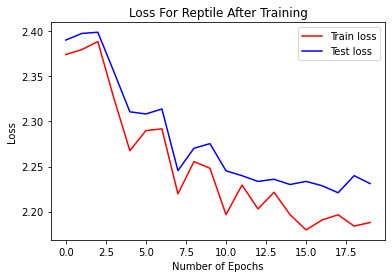

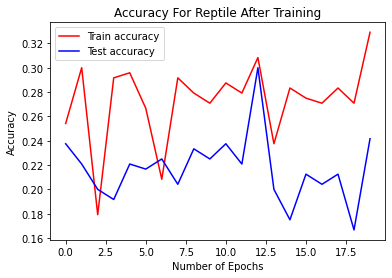

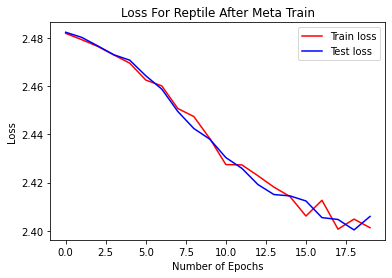

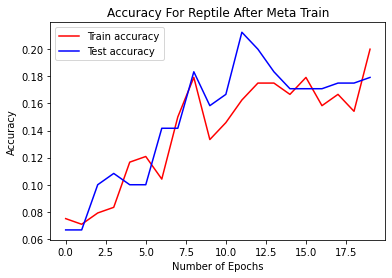

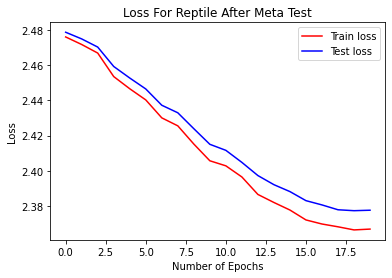

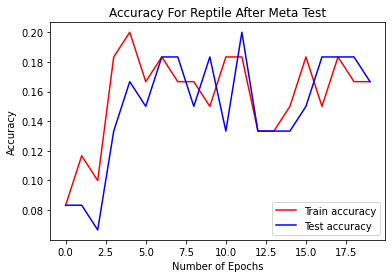

In [32]:
#plt.figure(figsize=(12,6))
plt.plot(afterTraining_train_loss, label='Train loss',color="#ff0000")
plt.plot(afterTraining_test_loss, label='Test loss',color="#0000ff")
plt.title('Loss For Reptile After Training') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.figure(figsize=(12,6))
plt.plot(afterTraining_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(afterTraining_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Accuracy For Reptile After Training') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#------------#
#plt.figure(figsize=(12,6))
plt.plot(afterMetaTrain_train_loss, label='Train loss',color="#ff0000")
plt.plot(afterMetaTrain_test_loss, label='Test loss',color="#0000ff")
plt.title('Loss For Reptile After Meta Train') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.show()

#plt.figure(figsize=(12,6))
plt.plot(afterMetaTrain_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(afterMetaTrain_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Accuracy For Reptile After Meta Train') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#------------#
#plt.figure(figsize=(12,6))
plt.plot(afterMetaTest_train_loss, label='Train loss',color="#ff0000")
plt.plot(afterMetaTest_test_loss, label='Test loss',color="#0000ff")
plt.title('Loss For Reptile After Meta Test') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.show()

#plt.figure(figsize=(12,6))
plt.plot(afterMetaTest_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(afterMetaTest_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Accuracy For Reptile After Meta Test') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

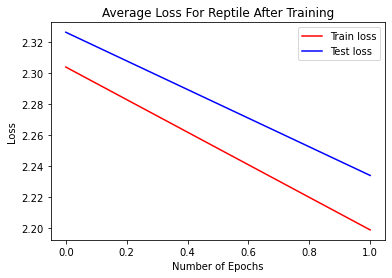

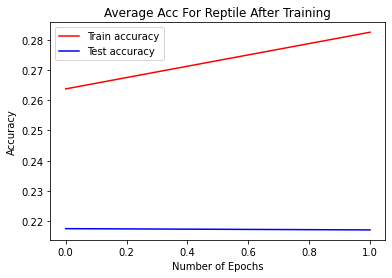

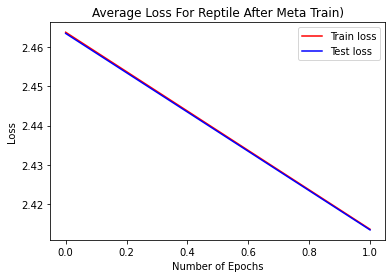

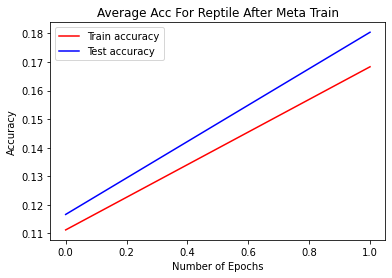

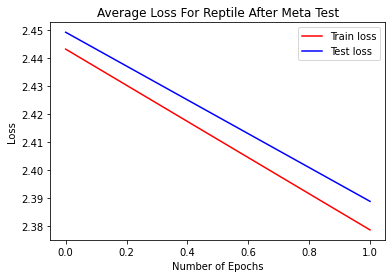

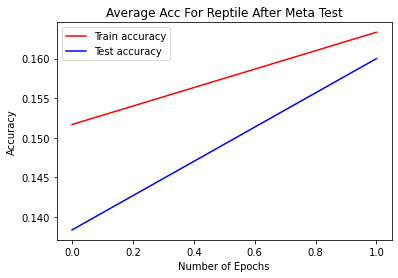

In [33]:
n = 10
avr_afterTraining_train_loss = np.mean(np.array(afterTraining_train_loss).reshape(-1, n), axis=1)
avr_afterTraining_test_loss = np.mean(np.array(afterTraining_test_loss).reshape(-1, n), axis=1)

avr_afterTraining_train_acc = np.mean(np.array(afterTraining_train_acc).reshape(-1, n), axis=1)
avr_afterTraining_test_acc = np.mean(np.array(afterTraining_test_acc).reshape(-1, n), axis=1)

#plt.figure(figsize=(12,6))
plt.plot(avr_afterTraining_train_loss, label='Train loss',color="#ff0000")
plt.plot(avr_afterTraining_test_loss, label='Test loss',color="#0000ff")
plt.title('Average Loss For Reptile After Training') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.figure(figsize=(12,6))
plt.plot(avr_afterTraining_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(avr_afterTraining_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Average Acc For Reptile After Training') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#------------#

avr_afterMetaTrain_train_loss = np.mean(np.array(afterMetaTrain_train_loss).reshape(-1, n), axis=1)
avr_afterMetaTrain_test_loss = np.mean(np.array(afterMetaTrain_test_loss).reshape(-1, n), axis=1)

avr_afterMetaTrain_train_acc = np.mean(np.array(afterMetaTrain_train_acc).reshape(-1, n), axis=1)
avr_afterMetaTrain_test_acc = np.mean(np.array(afterMetaTrain_test_acc).reshape(-1, n), axis=1)

#plt.figure(figsize=(12,6))
plt.plot(avr_afterMetaTrain_train_loss, label='Train loss',color="#ff0000")
plt.plot(avr_afterMetaTrain_test_loss, label='Test loss',color="#0000ff")
plt.title('Average Loss For Reptile After Meta Train)') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.show()

#plt.figure(figsize=(12,6))
plt.plot(avr_afterMetaTrain_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(avr_afterMetaTrain_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Average Acc For Reptile After Meta Train') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#------------#

avr_afterMetaTest_train_loss = np.mean(np.array(afterMetaTest_train_loss).reshape(-1, n), axis=1)
avr_afterMetaTest_test_loss = np.mean(np.array(afterMetaTest_test_loss).reshape(-1, n), axis=1)

avr_afterMetaTest_train_acc = np.mean(np.array(afterMetaTest_train_acc).reshape(-1, n), axis=1)
avr_afterMetaTest_test_acc = np.mean(np.array(afterMetaTest_test_acc).reshape(-1, n), axis=1)

#plt.figure(figsize=(12,6))
plt.plot(avr_afterMetaTest_train_loss, label='Train loss',color="#ff0000")
plt.plot(avr_afterMetaTest_test_loss, label='Test loss',color="#0000ff")
plt.title('Average Loss For Reptile After Meta Test') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.show()

#plt.figure(figsize=(12,6))
plt.plot(avr_afterMetaTest_train_acc, label='Train accuracy',color="#ff0000")
plt.plot(avr_afterMetaTest_test_acc, label='Test accuracy',color="#0000ff")
plt.title('Average Acc For Reptile After Meta Test') 
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
mamlInt_maml_model,mamlInt_train_loss, mamlInt_train_acc, mamlInt_test_loss, mamlInt_test_acc = reptile_maml.reptile_test(train_k10,test_c10, epochs = 20, transfer_weights="True")

InvalidArgumentError: ignored

In [ ]:
randomInt_maml_model,randomInt_train_loss, randomInt_train_acc, randomInt_test_loss, randomInt_test_acc = reptile_maml.reptile_test(train_dataset,test_dataset, epochs = 20, transfer_weights="False")

In [ ]:
#plt.figure(figsize=(12,6))
plt.plot(mamlInt_test_acc, label='Maml Initialization',color="#ff0000")
plt.plot(RandomInt_test_acc, label='Random Initialization',color="#0000ff")
plt.title('Paper Implementation')
plt.xlabel('Number of Epochs') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## References:
- https://www.kdnuggets.com/2019/12/google-open-sources-mobilenetv3-improve-mobile-computer-vision-models.html